In [1]:
# misc
import warnings
warnings.filterwarnings('ignore')
import gc

# basic imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sns.set(palette='colorblind')

# processing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import gmean, mode
from scipy.sparse import csr_matrix

import shap

# models
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# This will be now a dataframe
def stats_prop(df, usefractions=False):
    means = []
    gmeans = []
    medians = []
    modes = []
    stds = []
    skews = []
    kurts = []
    mins = []
    maxs = []
    sums = []
    counts = []
    fractions = []
    q1s = []
    q3s = []
    p10s = []
    p20s = []
    p30s = []
    p40s = []
    p60s = []
    p70s = []
    p80s = []
    p90s = []
    log_means = []
    log_gmeans = []
    log_medians = []
    log_modes = []
    log_stds = []
    log_skews = []
    log_kurts = []
    log_mins = []
    log_maxs = []
    log_q1s = []
    log_q3s = []
    log_p10s = []
    log_p20s = []
    log_p30s = []
    log_p40s = []
    log_p60s = []
    log_p70s = []
    log_p80s = []
    log_p90s = []
       
    for i, row in df.iterrows():
        nonzero_values = row[row.nonzero()[0]]
        if usefractions:
            nonzero_values = nonzero_values[nonzero_values-nonzero_values//1 != 0.]
        means.append(nonzero_values.mean())
        gmeans.append(gmean(nonzero_values))
        medians.append(nonzero_values.median())
        modes.append(mode(nonzero_values)[0][0] if len(nonzero_values)>0 else np.nan)
        stds.append(nonzero_values.std())
        skews.append(nonzero_values.skew())
        kurts.append(nonzero_values.kurtosis())
        mins.append(nonzero_values.min())
        maxs.append(nonzero_values.max())
        sums.append(nonzero_values.sum())
        counts.append(nonzero_values.count())
        fractions.append(nonzero_values.count()/row.count())        
        q1s.append(np.percentile(nonzero_values, q=25) if len(nonzero_values)>0 else np.nan)
        q3s.append(np.percentile(nonzero_values, q=75) if len(nonzero_values)>0 else np.nan)
        p10s.append(np.percentile(nonzero_values, q=10) if len(nonzero_values)>0 else np.nan)
        p20s.append(np.percentile(nonzero_values, q=20) if len(nonzero_values)>0 else np.nan)
        p30s.append(np.percentile(nonzero_values, q=30) if len(nonzero_values)>0 else np.nan)
        p40s.append(np.percentile(nonzero_values, q=40) if len(nonzero_values)>0 else np.nan)
        p60s.append(np.percentile(nonzero_values, q=60) if len(nonzero_values)>0 else np.nan)
        p70s.append(np.percentile(nonzero_values, q=70) if len(nonzero_values)>0 else np.nan)
        p80s.append(np.percentile(nonzero_values, q=80) if len(nonzero_values)>0 else np.nan)
        p90s.append(np.percentile(nonzero_values, q=90) if len(nonzero_values)>0 else np.nan)
        log_means.append(np.log1p(nonzero_values).mean())
        log_gmeans.append(gmean(np.log1p(nonzero_values)))
        log_medians.append(np.log1p(nonzero_values).median())
        log_modes.append(mode(np.log1p(nonzero_values))[0][0] if len(nonzero_values)>0 else np.nan)
        log_stds.append(np.log1p(nonzero_values).std())
        log_skews.append(np.log1p(nonzero_values).skew())
        log_kurts.append(np.log1p(nonzero_values).kurtosis())
        log_mins.append(np.log1p(nonzero_values).min())
        log_maxs.append(np.log1p(nonzero_values).max())
        log_q1s.append(np.percentile(np.log1p(nonzero_values), q=25) if len(nonzero_values)>0 else np.nan)
        log_q3s.append(np.percentile(np.log1p(nonzero_values), q=75) if len(nonzero_values)>0 else np.nan)
        log_p10s.append(np.percentile(np.log1p(nonzero_values), q=10) if len(nonzero_values)>0 else np.nan)
        log_p20s.append(np.percentile(np.log1p(nonzero_values), q=20) if len(nonzero_values)>0 else np.nan)
        log_p30s.append(np.percentile(np.log1p(nonzero_values), q=30) if len(nonzero_values)>0 else np.nan)
        log_p40s.append(np.percentile(np.log1p(nonzero_values), q=40) if len(nonzero_values)>0 else np.nan)
        log_p60s.append(np.percentile(np.log1p(nonzero_values), q=60) if len(nonzero_values)>0 else np.nan)
        log_p70s.append(np.percentile(np.log1p(nonzero_values), q=70) if len(nonzero_values)>0 else np.nan)
        log_p80s.append(np.percentile(np.log1p(nonzero_values), q=80) if len(nonzero_values)>0 else np.nan)
        log_p90s.append(np.percentile(np.log1p(nonzero_values), q=90) if len(nonzero_values)>0 else np.nan)
    
    stat_df = pd.DataFrame({'means': np.array(means)})
    stat_df['gmeans'] = np.array(gmeans)
    stat_df['medians'] = np.array(medians)
    stat_df['modes'] = np.array(modes)
    #stat_df['stds'] = np.array(stds)
    #stat_df['skews'] = np.array(skews)
    #stat_df['kurts'] = np.array(kurts)
    stat_df['mins'] = np.array(mins)
    stat_df['maxs'] = np.array(maxs)
    stat_df['sums'] = np.array(sums)
    stat_df['counts'] = np.array(counts)
    stat_df['fractions'] = np.array(fractions)
    stat_df['q1s'] = np.array(q1s)
    stat_df['q3s'] = np.array(q3s)
    stat_df['p10s'] = np.array(p10s)
    stat_df['p20s'] = np.array(p20s)
    stat_df['p30s'] = np.array(p30s)
    stat_df['p40s'] = np.array(p40s)
    stat_df['p60s'] = np.array(p60s)
    stat_df['p70s'] = np.array(p70s)
    stat_df['p80s'] = np.array(p80s)
    stat_df['p90s'] = np.array(p90s)
    #stat_df = pd.DataFrame({'log_means': np.array(log_means)})
    stat_df['log_gmeans'] = np.array(log_gmeans)
    stat_df['log_medians'] = np.array(log_medians)
    stat_df['log_modes'] = np.array(log_modes)
    #stat_df['log_stds'] = np.array(log_stds)
    #stat_df['log_skews'] = np.array(log_skews)
    #stat_df['log_kurts'] = np.array(log_kurts)
    stat_df['log_mins'] = np.array(log_mins)
    stat_df['log_maxs'] = np.array(log_maxs)
    stat_df['log_q1s'] = np.array(log_q1s)
    stat_df['log_q3s'] = np.array(log_q3s)
    stat_df['log_p10s'] = np.array(log_p10s)
    stat_df['log_p20s'] = np.array(log_p20s)
    stat_df['log_p30s'] = np.array(log_p30s)
    stat_df['log_p40s'] = np.array(log_p40s)
    stat_df['log_p60s'] = np.array(log_p60s)
    stat_df['log_p70s'] = np.array(log_p70s)
    stat_df['log_p80s'] = np.array(log_p80s)
    stat_df['log_p90s'] = np.array(log_p90s)
    
    return stat_df    

In [3]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [4]:
target = train_data.target
train_ID = train_data.ID
train_data = train_data.drop(['target', 'ID'], axis=1)
test_ID = test_data.ID
test_data = test_data.drop(['ID'], axis=1)

In [5]:
vt = VarianceThreshold(threshold=0.)
vt.fit(train_data)
selected_columns = train_data.columns[vt.get_support(indices=True)]

In [6]:
train_data = train_data[selected_columns]
test_data = test_data[selected_columns]

train_data.shape

(4459, 4735)

In [7]:
train_data = train_data.T.drop_duplicates().T
test_data = test_data[train_data.columns]

train_data.shape

(4459, 4730)

In [8]:
train_data = train_data/1000.
test_data = test_data/1000.

In [9]:
log_target = np.log1p(target/1000.)
#log_target = np.log1p(target)

In [10]:
stat_train = stats_prop(train_data)
stat_test = stats_prop(test_data)

In [11]:
train_data = train_data.replace(0., np.nan)
test_data = test_data.replace(0., np.nan)

In [12]:
train_data.head()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
stat_train.head()

,means,gmeans,medians,modes,mins,maxs,sums,counts,fractions,q1s,...,log_q1s,log_q3s,log_p10s,log_p20s,log_p30s,log_p40s,log_p60s,log_p70s,log_p80s,log_p90s
0,7066.356209,2858.971431,2400.00000,400.0,250.0,40000.0,720768.33332,102,0.021564,912.5,...,6.817007,8.878479,6.016226,6.579178,7.030055,7.410382,8.309112,8.705490,9.341456,9.998843
1,7939.800995,4303.260088,2225.00000,2000.0,800.0,50000.0,531966.66668,67,0.014165,2000.0,...,7.601402,9.157766,7.601402,7.601402,7.601402,7.601402,8.294300,8.853808,9.544127,9.878957
2,4233.333333,2473.859829,4000.00000,4000.0,200.0,12000.0,76200.00000,18,0.003805,1125.0,...,7.010038,8.677932,5.942616,6.775018,7.364943,7.824446,8.357977,8.612685,8.699681,9.108949
3,1517.757575,401.771116,261.33333,100.0,2.0,6000.0,33390.66666,22,0.004651,100.0,...,4.615121,7.601402,4.615121,4.615121,4.615121,5.303305,6.338374,7.472248,7.601402,8.664920
4,6872.846154,2567.099104,4700.00000,200.0,60.0,37662.0,178694.00000,26,0.005497,1180.0,...,7.074117,8.972850,5.303305,5.993961,7.337760,7.601402,8.699681,8.869724,8.987322,9.301593


In [14]:
cols_leak = ['f190486d6', '58e2e02e6', 'eeb9cd3aa', '9fd594eec', '6eef030c1', 
            '15ace8c9f', 'fb0f5dbfe', '58e056e12', '20aa07010', '024c577b9', 
            'd6bb78916', 'b43a7cfd5', '58232a6fb', '1702b5bf0', '324921c7b', 
            '62e59a501', '2ec5b290f', '241f0f867', 'fb49e4212', '66ace2992', 
            'f74e8f13d', '5c6487af1', '963a49cdc', '26fc93eb7', '1931ccfdd', 
            '703885424', '70feb1494', '491b9ee45', '23310aa6f', 'e176a204a', 
            '6619d81fc', '1db387535', 'fc99f9426', '91f701ba2', '0572565c2', 
            '190db8488', 'adb64ff71', 'c47340d97', 'c5a231d81', '0ff32eb98']

In [52]:
predtrain = pd.read_csv('../data/predtrain.csv', header=None)

In [39]:
predtrain = predtrain[0].values

In [45]:
predtrain = np.log1p(np.expm1(predtrain)/1000)

In [54]:
idx_leak = predtrain[predtrain[0]>0].index.values

In [55]:
idx_leak

array([   0,    1,    3, ..., 4456, 4457, 4458], dtype=int64)

In [56]:
new_train = train_data.drop(idx_leak, axis=0)

In [61]:
# CV folds
kf = KFold(n_splits=10, shuffle=True)
n_splits = kf.get_n_splits()

In [62]:
# model parameters
params = {'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 'device':'cpu', 'feature_fraction': 0.2}

In [63]:
shap_values = np.zeros((new_train.shape[0],new_train.shape[1]+1))

for train_index, test_index in kf.split(new_train):
    
    X_tr, X_tst = new_train.values[train_index], new_train.values[test_index]
    y_tr, y_tst = log_target[train_index], log_target[test_index]
    
    train_set = lgb.Dataset(X_tr, label=y_tr)
    valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)
    
    bst = lgb.train(params, train_set, num_boost_round=1500, valid_sets=[train_set, valid_set], early_stopping_rounds=5,
                    verbose_eval=200)

    shap_values += shap.TreeExplainer(bst).shap_values(new_train.values)/n_splits

Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[10]	training's rmse: 1.69775	valid_1's rmse: 1.62818
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[34]	training's rmse: 1.64896	valid_1's rmse: 1.81591
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[1]	training's rmse: 1.68772	valid_1's rmse: 1.80866
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[5]	training's rmse: 1.68762	valid_1's rmse: 1.77052
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[2]	training's rmse: 1.69238	valid_1's rmse: 1.7658
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[18]	training's rmse: 1.68109	valid_1's rmse: 1.69137
Training until validation scores don't improve for 5 rounds.
Early stopping, best iteration is:
[23]	tra

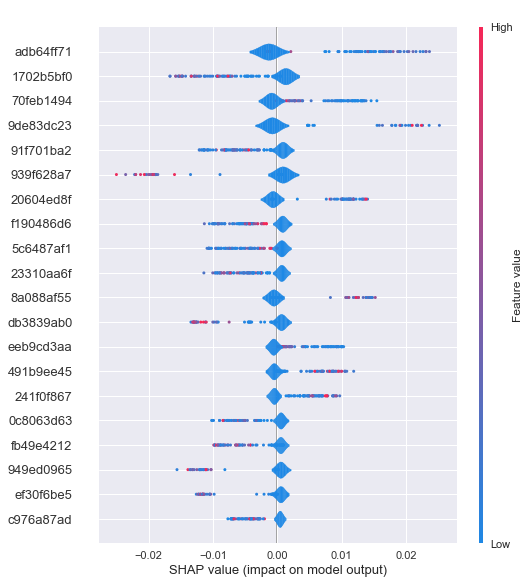

In [67]:
shap.summary_plot(shap_values, new_train, max_display=20, plot_type='violin')

In [68]:
N = 150
sorted_columns = np.argsort(np.sum(np.abs(shap_values), axis=0)[:-1])[::-1]
most_relevant = train_data.columns[sorted_columns[:N]]

In [69]:
union_cols = list(set(most_relevant)|set(cols_leak))
#diff_cols = list(set(most_relevant)-set(cols_leak))

In [107]:
feat_train = train_data
feat_test = test_data

In [108]:
feat_train = feat_train[feat_train.isna().sum().sort_values().index.values]
feat_test = feat_test[feat_train.isna().sum().sort_values().index.values]

In [ ]:
feats.remove('a7f6de992')
feats.remove('ae28689a2')

In [ ]:
feat_train = train_data[union_cols]
feat_test = test_data[union_cols]

In [ ]:
stat_train = stats_prop(feat_train)
stat_test = stats_prop(feat_test)

In [109]:
feat_train = feat_train.drop(idx_leak, axis=0)
#stat_train = stat_train.drop(idx_leak, axis=0)

#### Assembly

In [110]:
train_final = np.hstack((feat_train.values, stat_train.values))
test_final = np.hstack((feat_test.values, stat_test.values))

In [111]:
print('Final number of features: %i' % train_final.shape[1])

Final number of features: 4764


### oof train+test

In [94]:
train_df = pd.DataFrame.from_dict({'ID': train_ID})
test_df = pd.DataFrame.from_dict({'ID': test_ID})

In [120]:
def lgbCV(ooftrain, ooftest, n_folds=3, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.002, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.5, 'lambda_l1': 0.002}
    for i in range(multiplier):
        ooftrain['lgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['lgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            #predtrain_val = predtrain[test_index]
            
            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)
            
            #y_val[predtrain_val>0.] = predtrain_val[predtrain_val>0]

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['lgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['lgb_'+str(i)] = ooftest['lgb_'+str(i)] + np.expm1(bst.predict(test_final, 
                                                                                   num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
    return

In [121]:
def xgbCV(ooftrain, ooftest, n_folds=4, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_final)
    for i in range(multiplier):
        ooftrain['xgb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['xgb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)
            
            #predtrain_val = predtrain[test_index]
            
            #y_val[predtrain_val>0.] = predtrain_val[predtrain_val>0]

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['xgb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['xgb_'+str(i)] = ooftest['xgb_'+str(i)] + np.expm1(bst.predict(test_set,
                                                                                     ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
    return

In [122]:
def cbCV(ooftrain, ooftest, n_folds=4, multiplier=10):
    for i in range(multiplier):
        ooftrain['cb_'+str(i)] = np.zeros(train_ID.shape[0])
        ooftest['cb_'+str(i)] = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_final):
            X_tr, X_tst = train_final[train_index], train_final[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, l2_leaf_reg=8, border_count=45, iterations=7500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=5)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            ooftrain['cb_'+str(i)][test_index] = np.expm1(y_val)
    
            ooftest['cb_'+str(i)] = ooftest['cb_'+str(i)] + np.expm1(bst.predict(test_final))/n_folds

        print(np.mean(res))
    return

In [123]:
lgbCV(train_df,test_df)

1.6987086595860852
1.698908619122357
1.6987097888067015
1.701007189273505
1.6996005453429621
1.701900528178926
1.7006514673368602
1.700046218105123
1.6988556147510077
1.7000795982351553


In [80]:
xgbCV(train_df,test_df)

1.753413370789545
1.7429450380295344
1.7347238834013128
1.7502560436858898
1.7442130251524433
1.7454717536271072
1.7274041561163038
1.7623968415882652
1.7565706779197328
1.7654370172207414


In [ ]:
cbCV(train_df,test_df)

In [37]:
train_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,xgb_0,xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9
0,000d6aaf2,2565.983436,2086.443558,2260.534071,2701.728041,2069.787706,2261.766193,1973.316905,2471.285865,2407.232077,...,2627.829102,2392.968750,2945.404297,2270.577881,3017.836182,2678.730957,2188.171631,2449.648926,2809.797852,2612.948242
1,000fbd867,2921.002129,3093.502325,3527.628101,3248.547739,3445.516149,2918.703973,2778.843722,2886.965687,3599.330579,...,3096.312256,3603.129395,3107.948486,3022.036621,3217.696289,2850.651855,3544.313232,3209.409912,3028.671875,3537.489990
2,0027d6b71,2798.523489,2511.300145,2504.945872,2202.690138,2670.775177,2601.656087,2615.446777,2655.241777,2571.651617,...,2393.968994,2317.320068,2409.109375,2621.826660,2430.071289,2143.507568,2633.504883,2418.440674,2413.145508,2190.652100
3,0028cbf45,682.562484,810.585950,799.497231,750.521792,883.039854,726.673191,866.608056,796.145762,1044.218287,...,806.731812,1164.073853,1011.080688,1109.988281,845.801270,948.634949,831.039795,1009.720154,1067.922363,842.580750
4,002a68644,3142.640857,3757.304215,3131.859651,2781.894977,3566.504390,3749.006871,3716.042291,3941.930195,3235.503512,...,3036.584473,3366.578369,3159.438232,2838.515869,3179.260010,2630.410156,3414.225342,3413.212402,3161.795898,3132.460938


In [38]:
test_df.head()

,ID,lgb_0,lgb_1,lgb_2,lgb_3,lgb_4,lgb_5,lgb_6,lgb_7,lgb_8,...,xgb_0,xgb_1,xgb_2,xgb_3,xgb_4,xgb_5,xgb_6,xgb_7,xgb_8,xgb_9
0,000137c73,2208.472205,2145.254689,2044.938018,2175.858984,2176.588397,2115.722348,2052.703093,2060.573657,2117.585963,...,2611.120178,2636.073608,2449.379456,2581.673767,2405.734680,2782.324219,2757.645447,2912.211975,2732.431244,2689.832275
1,00021489f,1739.514761,1848.670285,1841.256499,1699.112199,1763.266443,1738.139625,1744.471739,1853.519936,1891.919021,...,1944.980743,1898.766663,1906.157501,2001.843994,1936.309601,1951.709198,2199.655151,2273.914520,2078.324005,2043.855438
2,0004d7953,1964.183165,1975.447112,2028.329491,2038.659446,2012.352609,1976.024373,2015.253768,2023.193226,2024.028484,...,2323.575500,2385.110046,2360.122253,2276.601196,2398.879639,2378.556152,2186.331970,2429.158539,2254.248047,2351.267395
3,00056a333,5480.846754,5328.587406,5226.245698,5339.886898,5440.191024,5333.590951,5503.242323,5490.707796,5597.542496,...,4833.179688,5087.514526,4673.544983,4614.738159,4858.242004,4480.678223,4381.140625,4777.290649,4843.488647,4880.068176
4,00056d8eb,2254.158540,2181.381761,2186.360207,2252.343034,2159.100507,2292.238724,2282.147165,2287.989536,2233.866354,...,2448.493561,2446.369202,2657.072449,2438.778137,2490.410522,2422.372833,2605.997681,2544.232666,2579.081238,2627.478516


In [ ]:
train_df.to_csv('../submission_files/leak/oof/train_df_440f_10x5fold.csv', index=False)
test_df.to_csv('../submission_files/leak/oof/test_df_440f_10x5fold.csv', index=False)
#train_df = pd.read_csv('../submission_files/leak/oof/train_df_sumf_pc_10x5fold.csv')
#test_df = pd.read_csv('../submission_files/leak/oof/test_df_sumf_pc_10x5fold.csv')

In [124]:
train_df = train_df.drop(['ID'], axis=1)
test_df = test_df.drop(['ID'], axis=1)

In [125]:
#train_df = train_df[train_df.columns[:10]]
#test_df = test_df[test_df.columns[:10]]

In [126]:
#train_df2 = np.hstack((train_df.values, stat_train.values))#, stat_train2.values))
#test_df2 = np.hstack((test_df.values, stat_test.values))#, stat_test2.values))
train_df2 = train_df.values
test_df2 = test_df.values

In [127]:
train_df2.shape

(4459, 10)

### Final CV

#### cb

In [128]:
def finalCV(n_folds=3, multiplier=10):
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            bst = cb.CatBoostRegressor(eta=0.01, iterations=2500,
                                       loss_function='RMSE', eval_metric='RMSE', depth=4)
    
            bst.fit(X_tr, y_tr, use_best_model=True, eval_set=(X_tst, y_tst), verbose=False)

            y_val = bst.predict(X_tst)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [129]:
def lgbfinalCV(n_folds=5, multiplier=10):
    params = {'boosting': 'gbdt', 'objective':'regression', 'learning_rate':0.01, 'metric':'rmse', 'max_bin':63, 
              'lambda_l2': 0.1, 'device':'cpu', 'feature_fraction': 0.1, 'lambda_l1': 0.002}
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = lgb.Dataset(X_tr, label=y_tr)
            valid_set = lgb.Dataset(X_tst, label=y_tst, reference=train_set)

            bst = lgb.train(params, train_set, num_boost_round=7500, valid_sets=[train_set, valid_set],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(X_tst, num_iteration=bst.best_iteration)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_df2, num_iteration=bst.best_iteration))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [130]:
def xgbfinalCV(n_folds=5, multiplier=10):
    params = {'booster': 'gbtree', 'learning_rate':0.003, 'colsample_bytree': .75, 'eval_metric':'rmse', 'lambda': 0.0004,
              'alpha': 0., 'min_child_weight': 4, 'subsample': 0.15}
    test_set = xgb.DMatrix(test_df2)
    submission = pd.DataFrame.from_dict({'ID': test_ID, 'target': np.zeros(test_ID.shape[0])})
    for i in range(multiplier):
        preds = np.zeros(test_ID.shape[0])
        kf = KFold(n_splits=n_folds,shuffle=True)
        res = []
        for train_index, test_index in kf.split(train_df2):
            X_tr, X_tst = train_df2[train_index], train_df2[test_index]
            y_tr, y_tst = log_target[train_index], log_target[test_index]

            train_set = xgb.DMatrix(X_tr, label=y_tr)
            valid_set = xgb.DMatrix(X_tst, label=y_tst)

            bst = xgb.train(params, train_set, num_boost_round=20000, evals=[(train_set, 'train'), (valid_set, 'val')],
                            early_stopping_rounds=500, verbose_eval=False)

            y_val = bst.predict(valid_set, ntree_limit=bst.best_ntree_limit)

            rmsle = np.sqrt(mean_squared_error(y_tst, y_val))
            
            res.append(rmsle)
            
            preds = preds + np.expm1(bst.predict(test_set, ntree_limit=bst.best_ntree_limit))/n_folds

        print(np.mean(res))
        
        submission.target = submission.target + preds/multiplier
    return submission

In [131]:
submission_cb = finalCV()

1.750840996888252


KeyboardInterrupt: 

In [132]:
submission_lgb = lgbfinalCV()

1.7460416270300523
1.7454358331196211
1.7457964552640413
1.7463268454211824
1.7449163841189432
1.745090013300624
1.7452489740676183
1.7462226876971338
1.7461424436240347
1.74505421475804


In [ ]:
submission_xgb = xgbfinalCV()

#### ceiling to overestimate

In [ ]:
for submission in [submission_cb,submission_lgb,submission_xgb]:
    submission.target = 1000*np.ceil(submission.target)
#submission.target = 1000*submission.target

In [ ]:
submission_cb.head(11)

In [ ]:
submission_lgb.head(11)

In [ ]:
submission_xgb.head(11)

In [ ]:
submission_cb.to_csv('../submission_files/leak/58. stackcb_440f.csv', index=False)
submission_lgb.to_csv('../submission_files/leak/56. stacklgb_440f.csv', index=False)
submission_xgb.to_csv('../submission_files/leak/57. stackxgb_440f.csv', index=False)

In [ ]:
submission = pd.read_csv("../submission_files/leak/24. stackcb_sumf_pc_138.csv")

In [ ]:
leak2 = pd.read_csv('../submission_files/leak/public/extraf6.csv')

leak2_idx = leak2[leak2.target != 0.].index.values
leak2_vals = leak2[leak2.target != 0.].target.values

leak2_vals = np.round(np.expm1(leak2_vals))

In [ ]:
sub = submission.copy()

In [ ]:
sub.target = 0.5*submission.target + 0.5*submission_cb.target

In [ ]:
sub.target[leak2_idx] = 0.5*sub.target[leak2_idx] + 0.5*leak2_vals

In [ ]:
sub.head(11)

In [ ]:
sub.to_csv("../submission_files/leak/59. 05x24+05x58.csv", index=False)

In [ ]:
sub = pd.read_csv('../submission_files/leak/public/04. honest_v5_137.csv')

In [ ]:
sub2 = pd.read_csv('../submission_files/leak/59. 05x24+05x58_138.csv')

In [ ]:
sub3 = sub.copy()

In [ ]:
sub3.target = 0.7*sub.target + 0.3*sub2.target

In [ ]:
sub3.to_csv("../submission_files/leak/60. 03x59+07xpublic04.csv", index=False)

In [ ]:
ss = pd.read_csv('../submission_files/leak/28. 24+public03_059_best.csv')

In [ ]:
sub['h'] = sub.target - ss.target

In [ ]:
sub.h[sub.h!=0].index.values.shape